In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv("iris.csv")

In [4]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
label_encoder = LabelEncoder()
df['Species'] = label_encoder.fit_transform(df['Species'])


In [9]:
X = df.drop("Species", axis=1)
y = df["Species"]


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [12]:

df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [13]:
df = df.drop_duplicates()


In [14]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [16]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
rfe = RFE(model, n_features_to_select=3)  
rfe.fit(X_train, y_train)
X_train = rfe.transform(X_train)
X_test = rfe.transform(X_test)


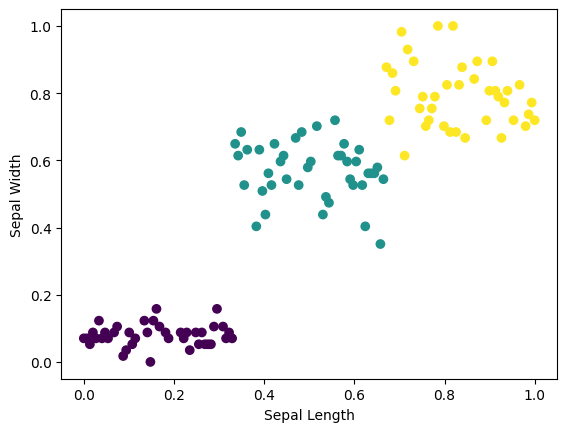

In [19]:
import matplotlib.pyplot as plt

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()


In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)



In [21]:
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(contamination=0.05)
outliers = iso_forest.fit_predict(X_train)
X_train = X_train[outliers != -1]
y_train = y_train[outliers != -1]


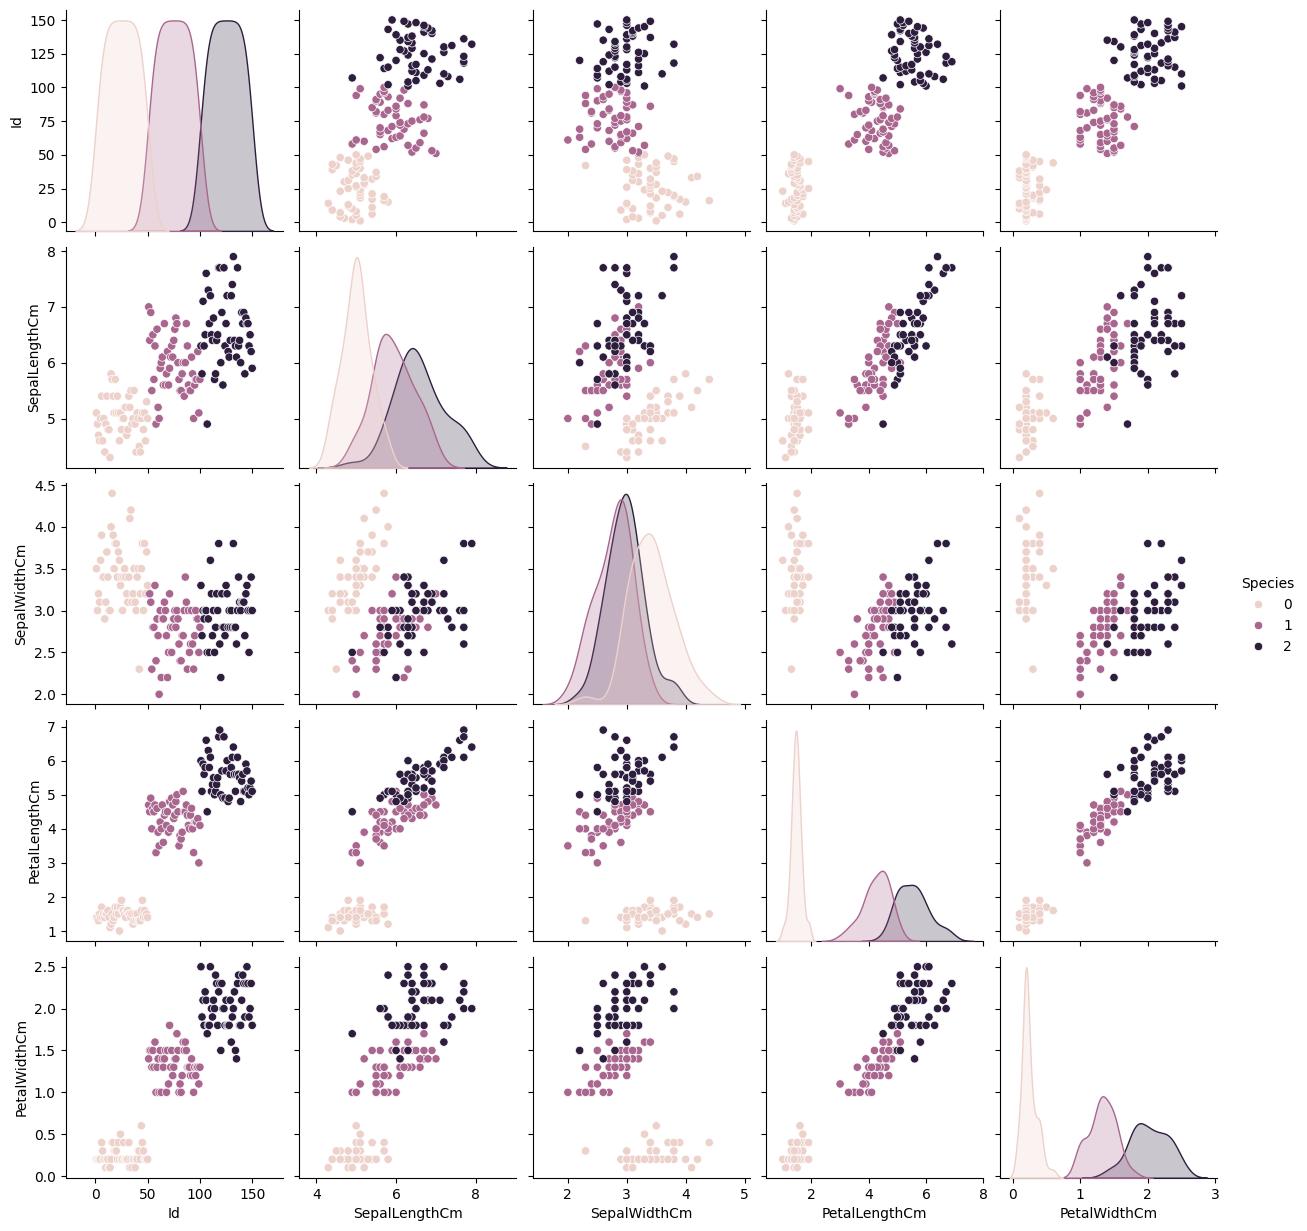

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df, hue="Species")
plt.show()



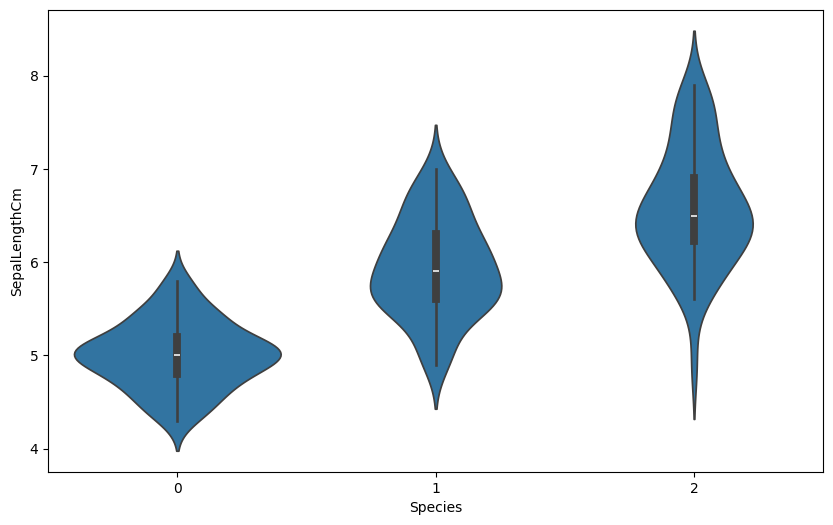

In [23]:
plt.figure(figsize=(10, 6))
sns.violinplot(x="Species", y="SepalLengthCm", data=df)
plt.show()


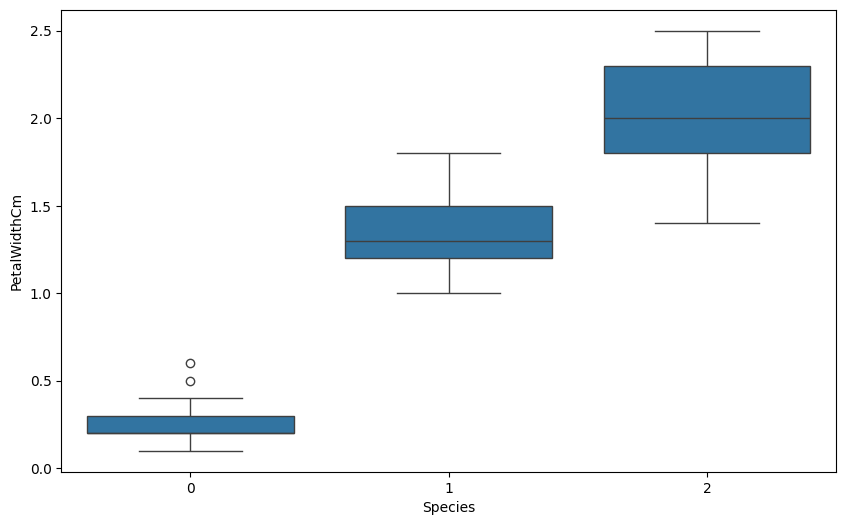

In [24]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Species", y="PetalWidthCm", data=df)
plt.show()


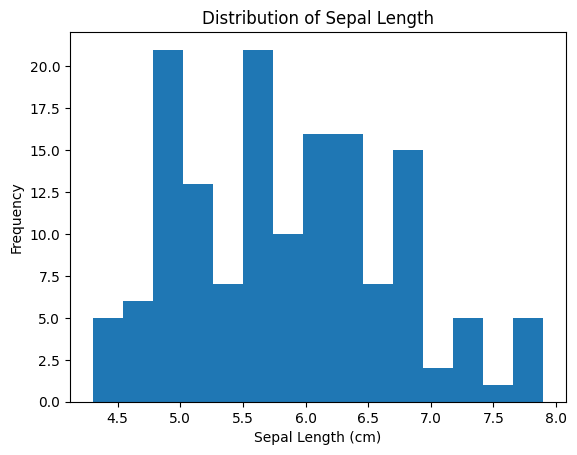

In [25]:
plt.hist(df["SepalLengthCm"], bins=15)
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Frequency")
plt.title("Distribution of Sepal Length")
plt.show()


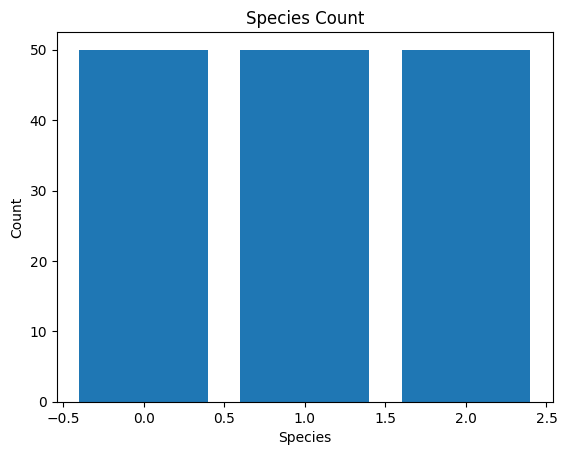

In [26]:
species_count = df["Species"].value_counts()
plt.bar(species_count.index, species_count.values)
plt.xlabel("Species")
plt.ylabel("Count")
plt.title("Species Count")
plt.show()


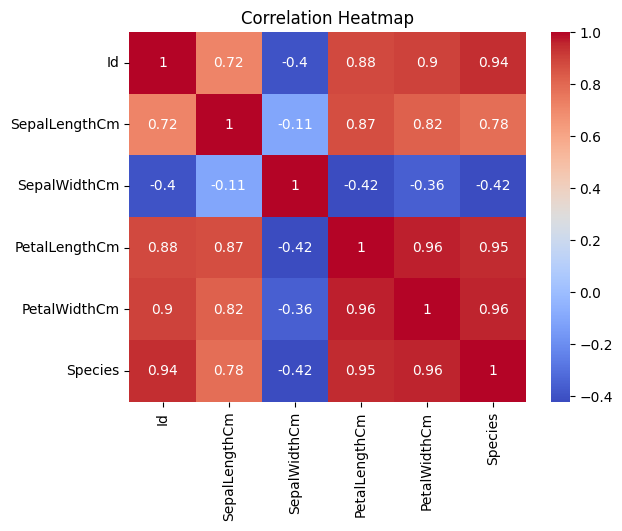

In [27]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


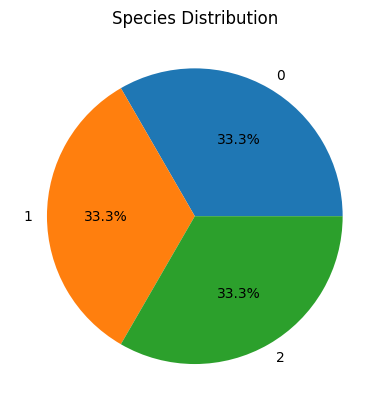

In [31]:
species_count = df["Species"].value_counts()
plt.pie(species_count, labels=species_count.index, autopct='%1.1f%%')
plt.title("Species Distribution")
plt.show()


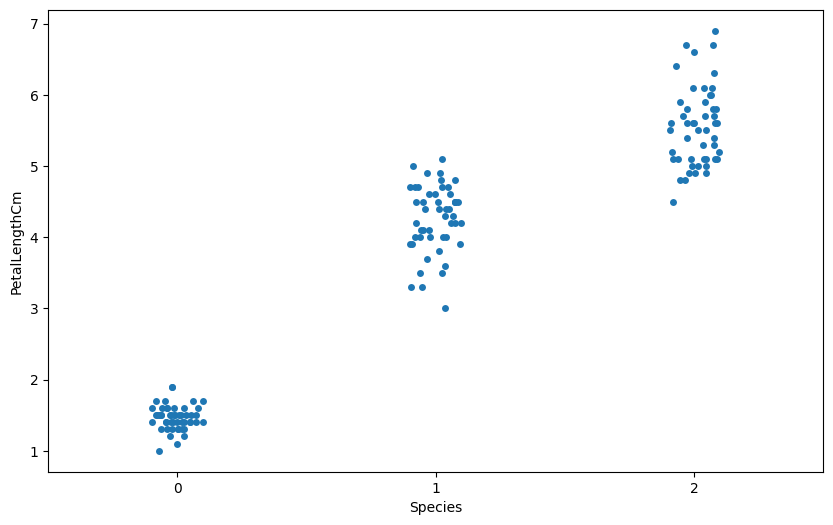

In [32]:
plt.figure(figsize=(10, 6))
sns.stripplot(x="Species", y="PetalLengthCm", data=df, jitter=True)
plt.show()


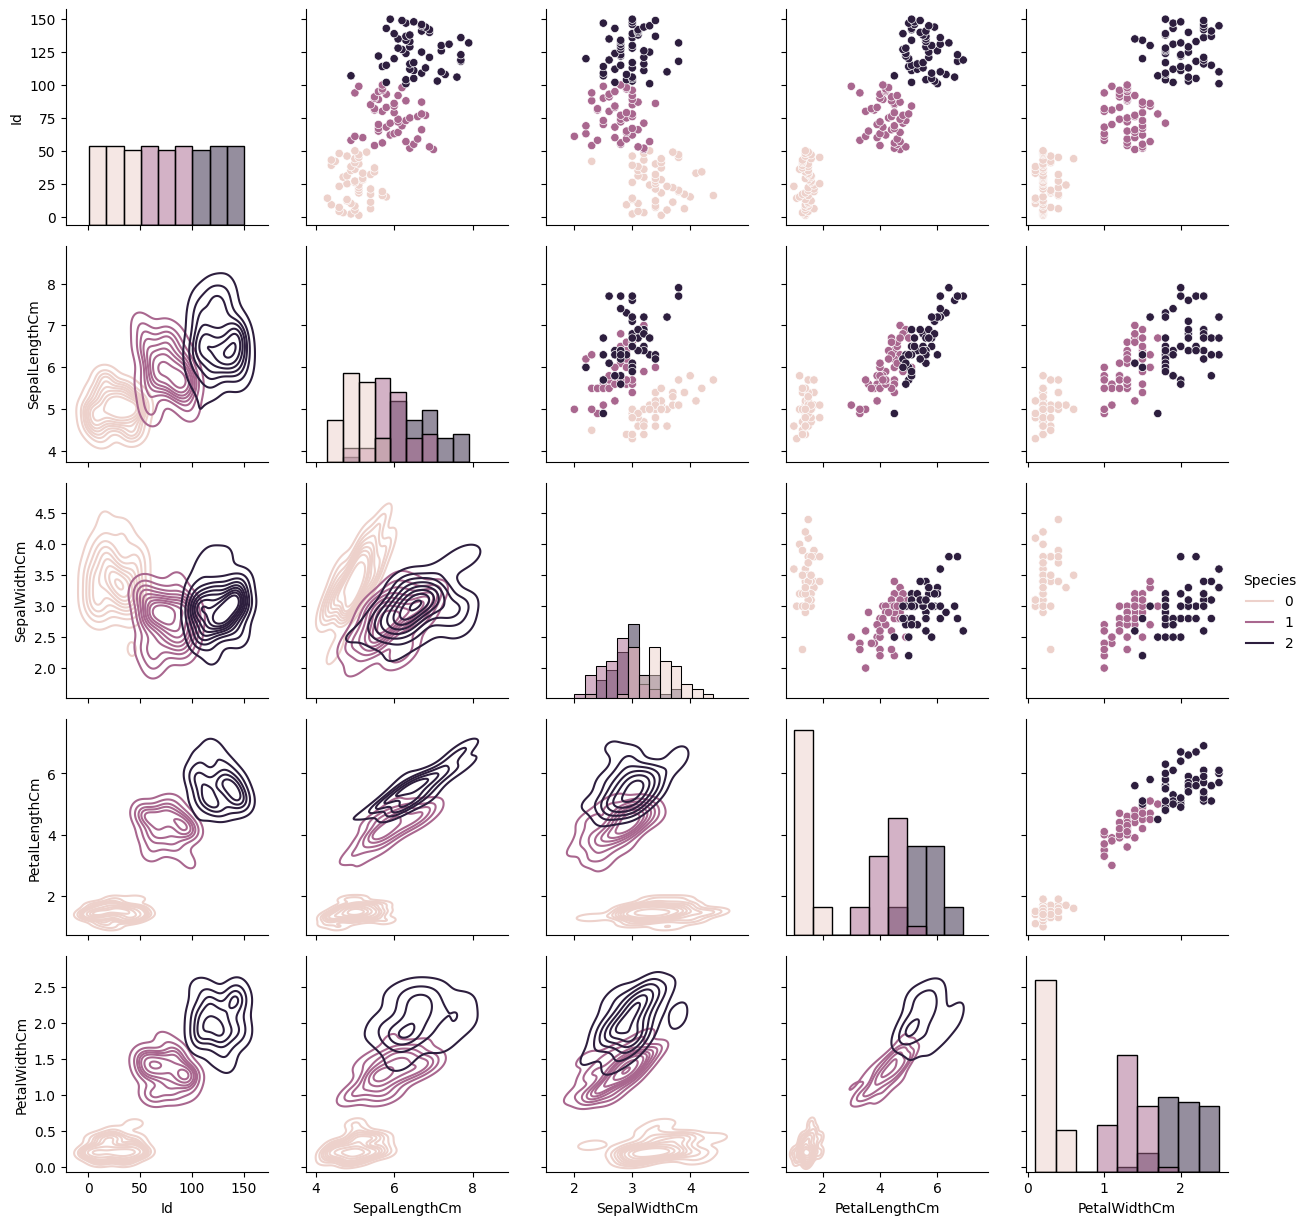

In [35]:
g = sns.PairGrid(df, hue="Species")
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.histplot)
g.add_legend()
plt.show()


In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)


dt_predictions = dt_model.predict(X_test)


dt_accuracy = accuracy_score(y_test, dt_predictions)
print("Decision Tree Accuracy: ", dt_accuracy)


Decision Tree Accuracy:  1.0


In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

rf_predictions = rf_model.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy: ", rf_accuracy)


Random Forest Accuracy:  1.0


In [41]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


svm_model = SVC()
svm_model.fit(X_train, y_train)


svm_predictions = svm_model.predict(X_test)


svm_accuracy = accuracy_score(y_test, svm_predictions)
print("SVM Accuracy: ", svm_accuracy)


SVM Accuracy:  1.0


In [42]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

gb_predictions = gb_model.predict(X_test)

gb_accuracy = accuracy_score(y_test, gb_predictions)
print("Gradient Boosting Accuracy: ", gb_accuracy)


Gradient Boosting Accuracy:  1.0


In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

knn_predictions = knn_model.predict(X_test)

knn_accuracy = accuracy_score(y_test, knn_predictions)
print("K-Nearest Neighbors Accuracy: ", knn_accuracy)


K-Nearest Neighbors Accuracy:  1.0
